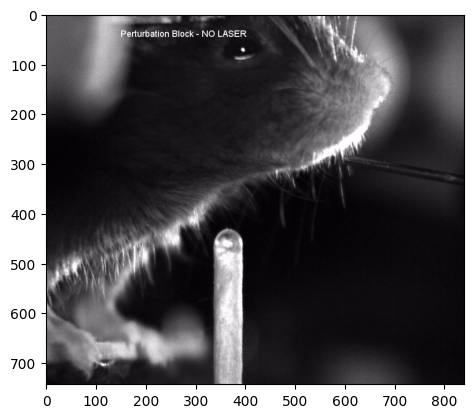

In [5]:
from dlclive import DLCLive, Processor
dlc_proc = Processor()
model_path = "DLC_Starter_mobilenet_v2_1.0_iteration-0_shuffle-1/"

import cv2
#img = cv2.imread("../pose_0/1601087741221816848.png")
img = cv2.imread("img001.png")
plt.imshow(img)

Model is trained to identify top and bottom of lever, along with the two hands of the mouse and the mouse's tongue (not visible)

In [6]:
dlc_live = DLCLive(model_path=model_path, processor=dlc_proc)

dlc_live.init_inference(img)
results = dlc_live.get_pose(img)
results

array([[2.3109901e+02, 6.8778778e+02, 4.4472121e-02],
       [7.4485947e+01, 6.8897290e+02, 7.1218354e-01],
       [3.6616425e+02, 7.4032117e+02, 9.2324138e-01],
       [2.1797429e+02, 6.6564551e+02, 9.9117517e-01],
       [3.6053214e+02, 4.3768787e+02, 9.8056978e-01]], dtype=float32)

In [7]:
def overwrite_image(image, points_predicted,scores):

    height, width = image.shape[:2]

    points_predicted = points_predicted.astype(int)

    # Printing as a circle
    for i in range(len(points_predicted)):
        #print(points)
        if scores[i] > 0.0:
            points = points_predicted[i]
            image = cv2.circle(image,tuple(points), 15, (0,255,0), -1)
    return image

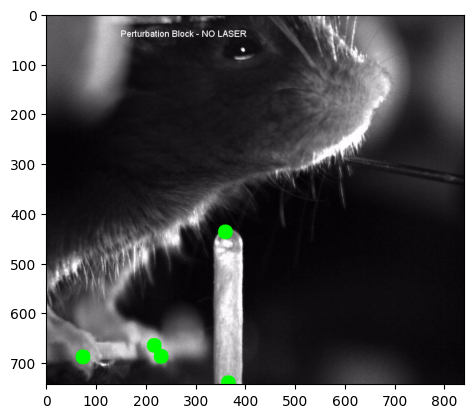

In [8]:
import matplotlib.pyplot as plt
points_predicted = results[:,:2]
points_predicted = points_predicted.astype(int)
scores = results[:,2]
img = overwrite_image(img, points_predicted, scores)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)